# Notebook for all the simulations

In [1]:
import simulation_functions as sim
import visualisation_functions as v
import numpy as np

# Simulation of the Naive Proof of Location Algorithm
### For every possible percent of lying cars, we iterate through every possible combination of remaining cars: honest and coerced.

The threshold here is 66%, a common security assumption in Byzantine scenarios

In [ ]:
import os
number_of_cars = 1000
target_path = '/npol t=0.66/new simulations/'

#current directory
cwd = os.getcwd()

#this is where all the simulation data will be saved. 
print(cwd + target_path)
simulation_id = 0

f = open("new_npol_LYING_cars_simulation_pathfiles.txt", "w+")

path = sim.make_directory(target_path)

for percent in range(0, 110, 10):
    
    lying_cars = percent/100 * number_of_cars
    print('lying cars: ',lying_cars, 'percentage', percent/100)
    honest_and_coerced = np.round((1 - (percent/100)), 2) * number_of_cars
    print('honest and coerced: ',honest_and_coerced, 'percentage', np.round((1 - (percent/100)), 2))

    for value in range(0, int(honest_and_coerced) + 10, 100):

        honest_cars = honest_and_coerced - value
        coerced_cars = value
    
        number_of_simulations = 100

        #`interest_variable` is the index of the variable we are looking at, in the list `variable_list`
        interest_variable = 1
        variable_list = [coerced_cars, lying_cars, honest_cars]

        simulation_id += 1

        #threshold set in this simulation for the Naive PoL algorithm is 0.66, 
        # meaning that at least 66% of your neighbours must see you
        sim_df = sim.nPoL_simulation(number_of_simulations, int(coerced_cars), int(lying_cars), int(honest_cars), 0.66)

        sim_pathfile = sim.save_simulation(sim_df, path, str(simulation_id) + 'lying_cars' + str(lying_cars)) 

        #saving the pathfiles of each simulation in the following text file.
        f=open("new_npol_LYING_cars_simulation_pathfiles.txt", "a+")
        f.write(sim_pathfile+'\n')
        f.close()

# Simulation of the Naive Proof of Location Algorithm
### For every possible percent of lying cars, we iterate through every possible combination of remaining cars: honest and coerced.

The threshold here is 100%, the most extreme and albeit unrealistic, worst case scenario.

In [ ]:
import os
number_of_cars = 1000
target_path = '/naivePoL/Percent of lying cars/new simulations/'

#current directory
cwd = os.getcwd()

#this is where all the simulation data will be saved: 
print(cwd + target_path)
simulation_id = 0

f = open("new_npol_LYING_cars_simulation_pathfiles.txt", "w+")

path = sim.make_directory(target_path)

for percent in range(0, 110, 10):
    
    lying_cars = percent/100 * number_of_cars
    honest_and_coerced = np.round((1 - (percent/100)), 2) * number_of_cars

    for value in range(0, int(honest_and_coerced) + 10, 100):

        honest_cars = honest_and_coerced - value
        coerced_cars = value
    
        number_of_simulations = 100

        #`interest_variable` is the index of the variable we are looking at, in the list `variable_list`
        interest_variable = 1
        variable_list = [coerced_cars, lying_cars, honest_cars]

        simulation_id += 1

        #threshold set in this simulation for the Naive PoL algorithm is 1, 
        # meaning that all your neighbours must see you too.
        sim_df = sim.nPoL_simulation(number_of_simulations, int(coerced_cars), int(lying_cars), int(honest_cars), 1)

        sim_pathfile = sim.save_simulation(sim_df, path, str(simulation_id) + 'lying_cars' + str(lying_cars)) 

        #saving the pathfiles of each simulation in the following text file.
        f=open("new_npol_LYING_cars_simulation_pathfiles.txt", "a+")
        f.write(sim_pathfile+'\n')
        f.close()

# Simulation for our proposed algorithm T-PoP

### For every possible percent of lying cars, we iterate through every possible combination of remaining cars: honest and coerced.

Each 'initial car' must name 2 witnesses, and each of these must name another 2 in turn. There are 6 other cars in total per round that must respond to seeing the cars naming them as witness. If at any point, any of these do not see the car naming them, the 'inital car' gets classified as lying. 
This means the threshold by default is set to 100%. 
This can be relaxed, and other variables can also be changed. Refer to the docs for more info.

In [ ]:
import os
number_of_cars = 1000
target_path = '/Percent of lying cars/new simulations/'

#current directory
cwd = os.getcwd()

#this is where all the simulation data will be saved:
print(cwd + target_path)
simulation_id = 0

f = open("aPoL_lying_cars_simulation_pathfiles.txt", "w+")

path = sim.make_directory(target_path)

for percent in range(0, 110, 10):
    
    lying_cars = percent/100 * number_of_cars
    honest_and_coerced = np.round((1 - (percent/100)), 2) * number_of_cars
    

    for value in range(0, int(honest_and_coerced) + 10, 100):

        honest_cars = honest_and_coerced - value
        coerced_cars = value
    
        number_of_simulations = 100

        #`interest_variable` is the index of the variable we are looking at, in the list `variable_list`
        interest_variable = 1
        variable_list = [coerced_cars, lying_cars, honest_cars]

        simulation_id += 1
        sim_df = sim.aPoL_simulation(number_of_simulations, int(coerced_cars), int(lying_cars), int(honest_cars), interest_variable, variable_list)

        sim_pathfile = sim.save_simulation(sim_df, path, str(simulation_id) + 'lying_cars' + str(lying_cars))

        #saving the pathfiles of each simulation in the following text file.
        f=open("aPoL_lying_cars_simulation_pathfiles.txt", "a+")
        f.write(sim_pathfile+'\n')
        f.close()

# Visualising contour plots for the T-PoP simulation
Below is the code for a single plot

    Percent of lying cars  Percent of coerced cars  Accuracy
0                     0.0                      0.0    76.997
1                     0.0                     10.0    76.861
2                     0.0                     20.0    76.740
3                     0.0                     30.0    76.165
4                     0.0                     40.0    76.246
..                    ...                      ...       ...
61                   80.0                     10.0    19.063
62                   80.0                     20.0    19.988
63                   90.0                      0.0     9.561
64                   90.0                     10.0    10.024
65                  100.0                      0.0     0.365

[66 rows x 3 columns]
[[76.997 76.997 76.997 ...  9.561  9.561  0.365]
 [76.861 76.861 76.861 ... 10.024 10.024    nan]
 [76.74  76.74  76.74  ...    nan    nan    nan]
 ...
 [76.997 76.997 76.997 ...  9.561  9.561  0.365]
 [76.861 76.861 76.861 ... 10.024 10.024    

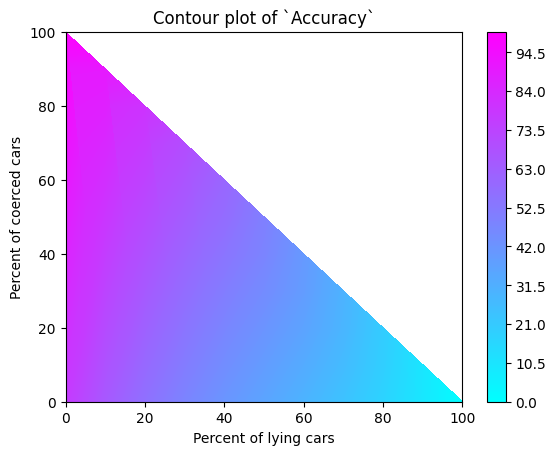

In [113]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

directory_pathfile = '/Users/amm3117/Desktop/T-PoP/Percent of lying cars/new simulations/'
# loading dataset
dataset = sim.full_csv_v2(directory_pathfile)

simulations = pd.DataFrame(dataset)


import numpy as np
import matplotlib.pyplot as plt
x = 'Percent of lying cars'
y = 'Percent of coerced cars'
z = 'Accuracy'

df_temp = simulations[[x, y, z]].reset_index(drop=True)
df_temp = df_temp.groupby([x, y]).mean().reset_index()
print(df_temp.sort_values([x, y]))

xlist = df_temp[x].values
ylist = df_temp[y].values
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros(X.shape)
#for each FP that equals 0, set it to a very small value below 1/1000 
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        z_val = df_temp[z][
            (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
        ]
        if z_val.empty:
            Z[i, j] = None

        else:
            Z[i, j] = z_val
print(Z)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, vmin = 0.000, vmax = 100, cmap='cool', levels = 200)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(f'Contour plot of `{z}`')
ax.set_xlabel(x)
ax.set_ylabel(y)
plt.show()




### And here we have the plots for True Positives, True Negatives, False Positives and False Negatives in percentages

i 0 z Percent True Positives
    Percent of lying cars  Percent of coerced cars  Percent True Positives
0                     0.0                      0.0                  76.997
1                     0.0                     10.0                  76.861
2                     0.0                     20.0                  76.740
3                     0.0                     30.0                  76.165
4                     0.0                     40.0                  76.246
..                    ...                      ...                     ...
61                   80.0                     10.0                  18.430
62                   80.0                     20.0                  19.602
63                   90.0                      0.0                   8.964
64                   90.0                     10.0                   9.658
65                  100.0                      0.0                   0.000

[66 rows x 3 columns]
i 1 z Percent True Negatives
    Percent of lyin

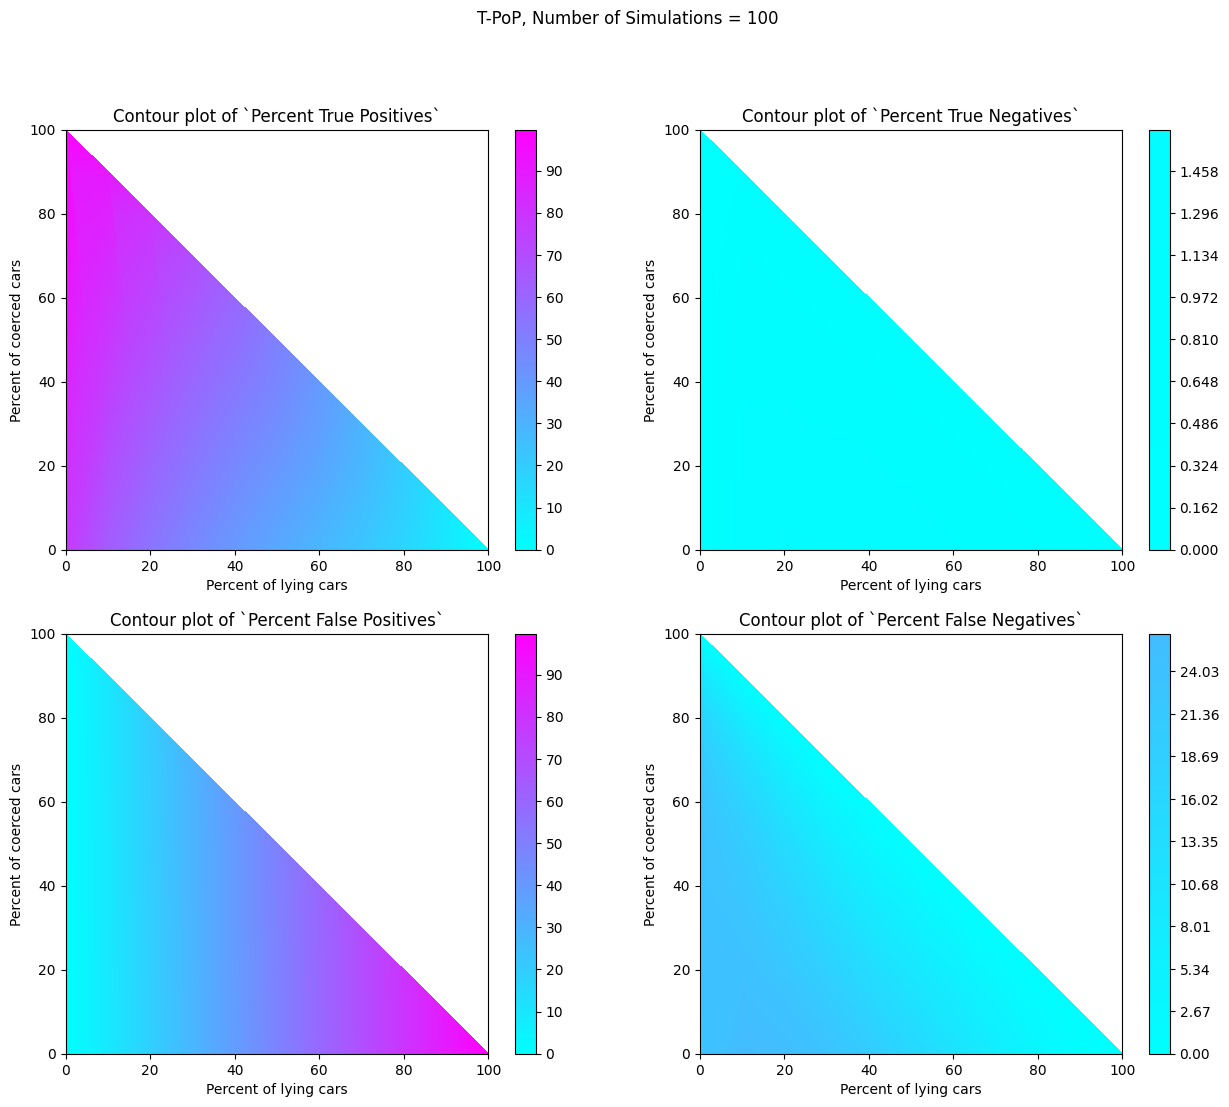

In [108]:

import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('T-PoP, Number of Simulations = 100')

directory_pathfile = '/Users/amm3117/Desktop/T-PoP/Percent of lying cars/new simulations/'
# loading dataset
dataset = sim.full_csv_v2(directory_pathfile)
vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
simulations = pd.DataFrame(dataset)
for i, ax in enumerate(axes.flat):
    print('i', i, 'z', vars[i])
    z = vars[i]

    x = 'Percent of lying cars'
    y = 'Percent of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()
    print(df_temp.sort_values([x, y]))

    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    
    cp = ax.contourf(X, Y, Z, vmin = 0.000, vmax = 100, cmap='cool', levels = 1000)
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
ax.savefig(directory_pathfile +'full_data.csv' + 'plots/' + 'subplots.png')

### Same thing but for the Naive PoL simulation, with threshold = 1

i 0 z Percent True Positives
    Percent of lying cars  Percent of coerced cars  Percent True Positives
0                     0.0                      0.0                  99.845
1                     0.0                     10.0                  99.815
2                     0.0                     20.0                  99.685
3                     0.0                     30.0                  99.467
4                     0.0                     40.0                  99.223
..                    ...                      ...                     ...
61                   80.0                     10.0                  10.028
62                   80.0                     20.0                  20.000
63                   90.0                      0.0                   0.010
64                   90.0                     10.0                  10.000
65                  100.0                      0.0                   0.000

[66 rows x 3 columns]
i 1 z Percent True Negatives
    Percent of lyin

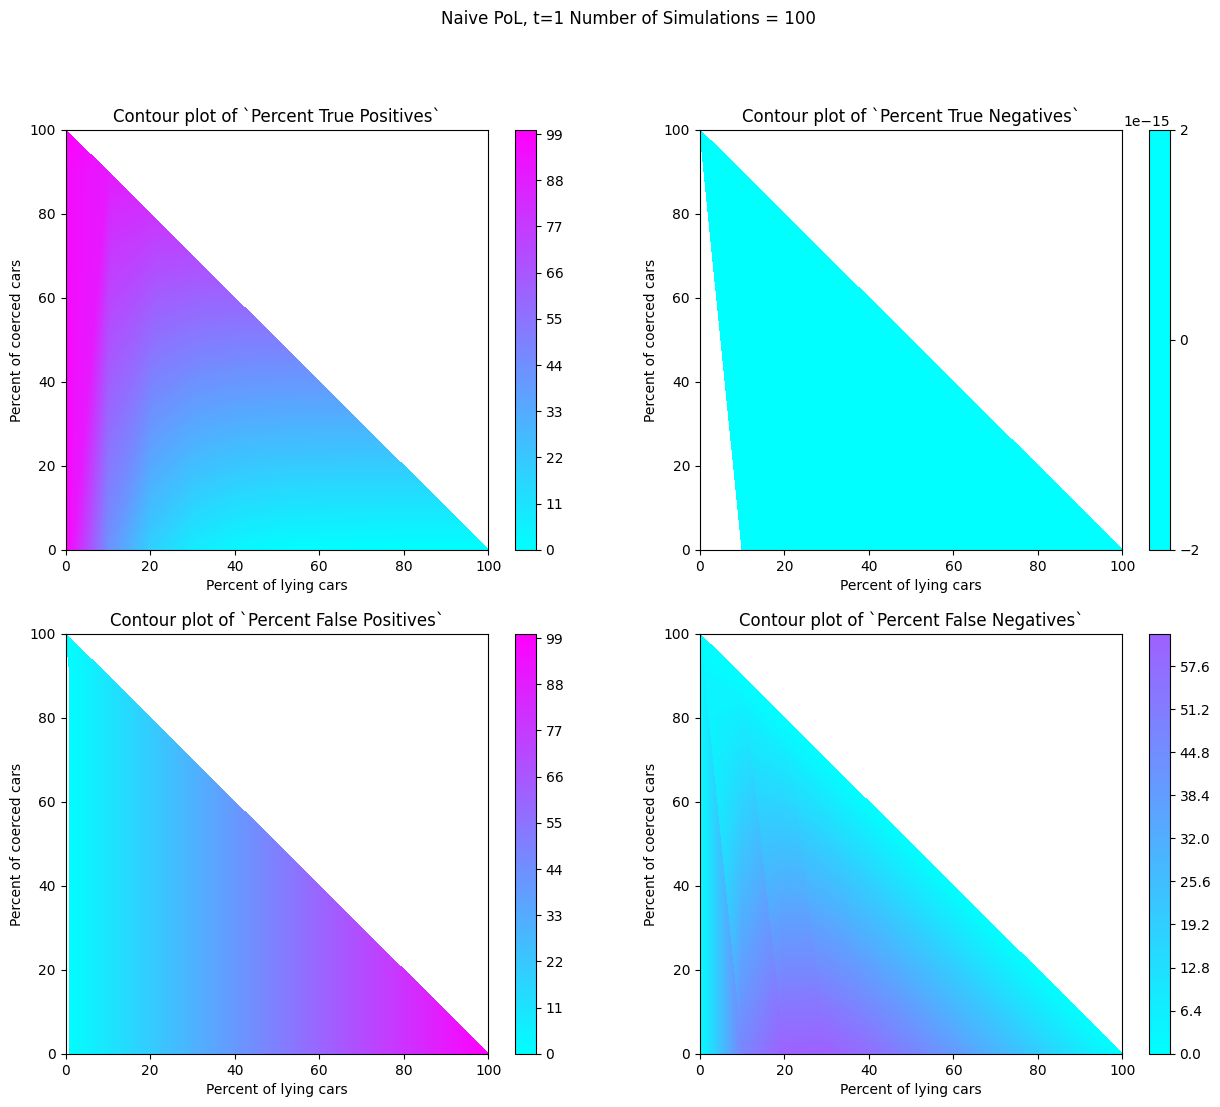

In [112]:

import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('Naive PoL, t=1 Number of Simulations = 100')

directory_pathfile = '/Users/amm3117/Desktop/T-PoP/naivePoL/Percent of lying cars/new simulations/'
# loading dataset
dataset = sim.full_csv_v2(directory_pathfile)
vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
simulations = pd.DataFrame(dataset)
for i, ax in enumerate(axes.flat):
    print('i', i, 'z', vars[i])
    z = vars[i]

    x = 'Percent of lying cars'
    y = 'Percent of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()
    print(df_temp.sort_values([x, y]))

    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    
    cp = ax.contourf(X, Y, Z, vmin = 0, vmax = 100, cmap='cool', levels = 100)
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
#ax.savefig(directory_pathfile +'full_data.csv' + 'plots/' + 'subplots.png')

### Boxplot Visualisations of Naive PoL algorithm with t= 1

/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

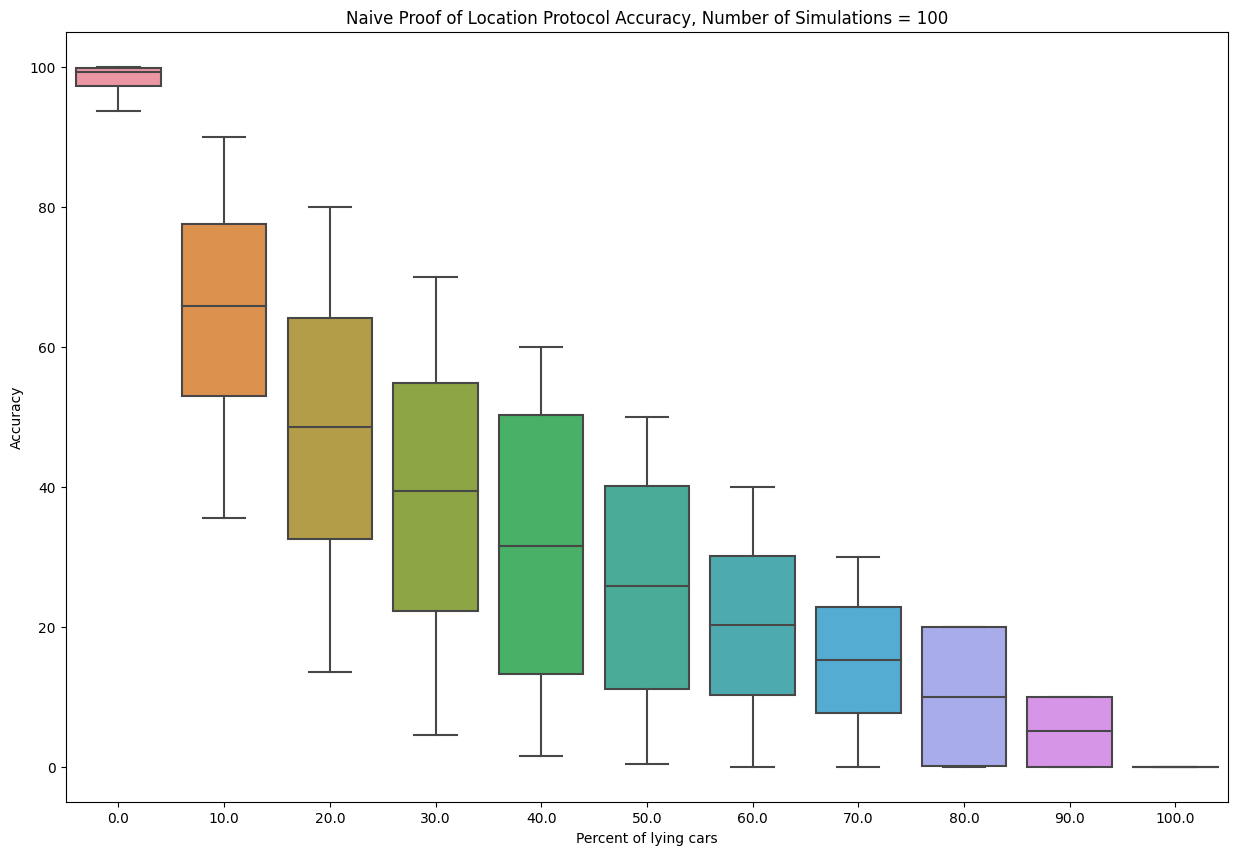

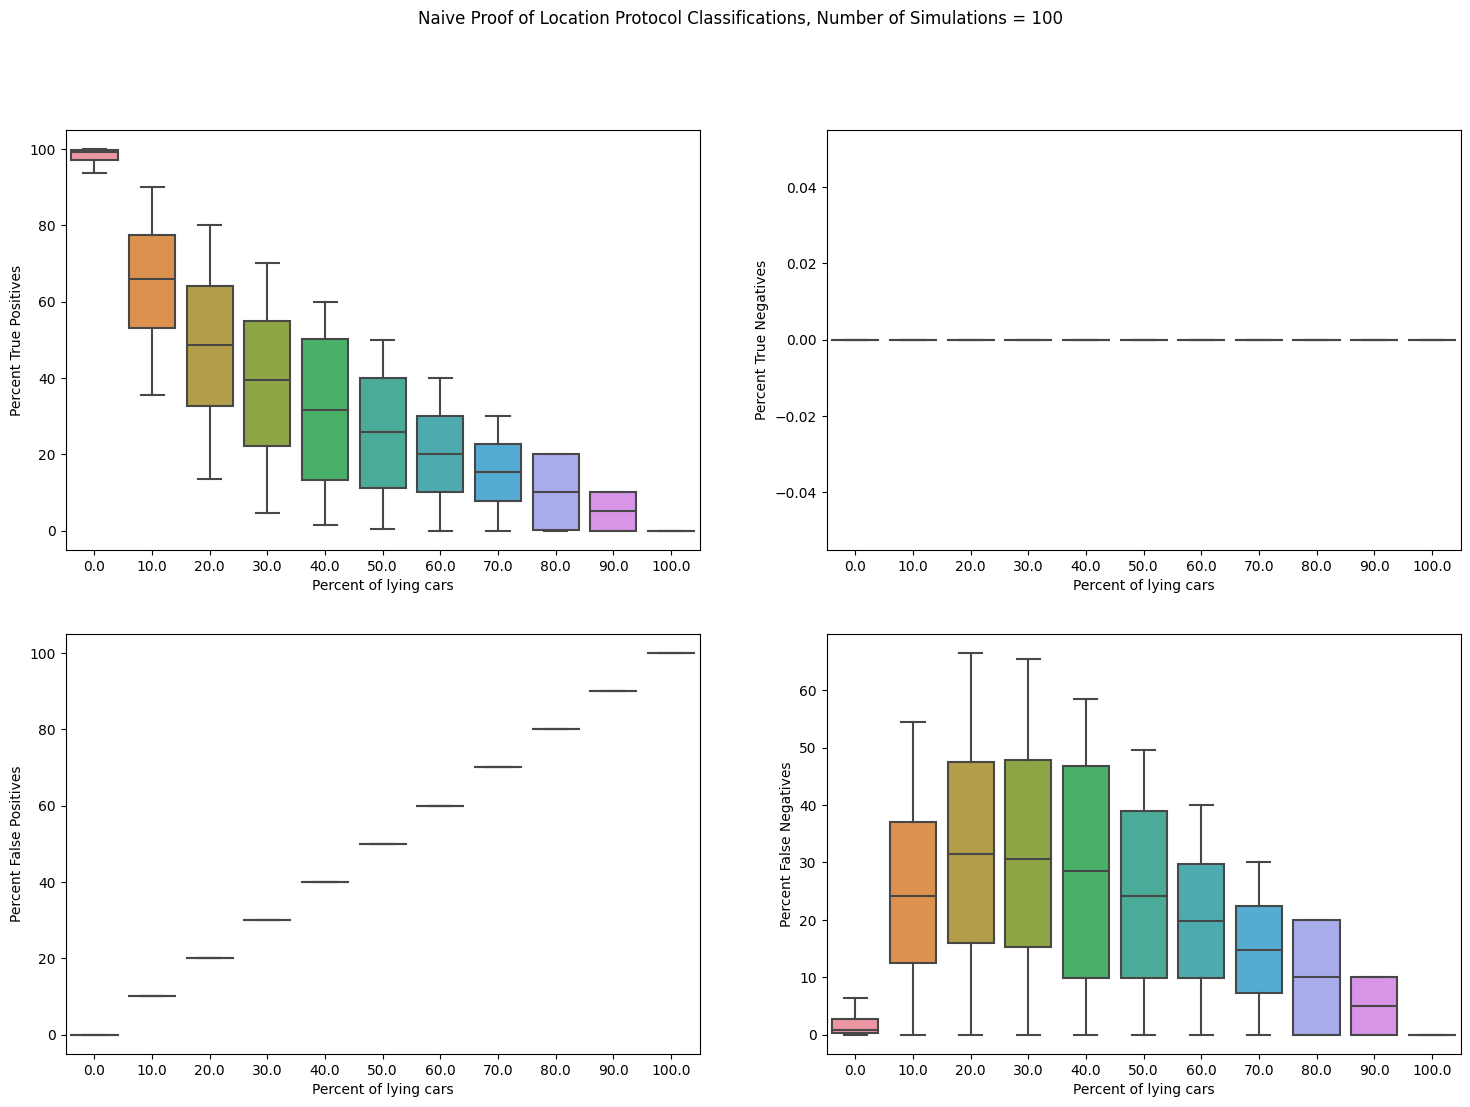

In [114]:
directory_pathfile = '/Users/amm3117/Desktop/T-PoP/naivePoL/Percent of lying cars/new simulations/'
sim.full_csv(directory_pathfile)


v.simulation_box_plots('Naive ', 100, directory_pathfile+'full_data.csv', 'Percent of lying cars', 'Accuracy')
v.subplots('Naive ', directory_pathfile, 100, 'Percent of lying cars')

### Boxplot Visualisations for T-PoP algorithm

/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/Users/amm3117/Desktop/T-PoP/simulation_functions.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

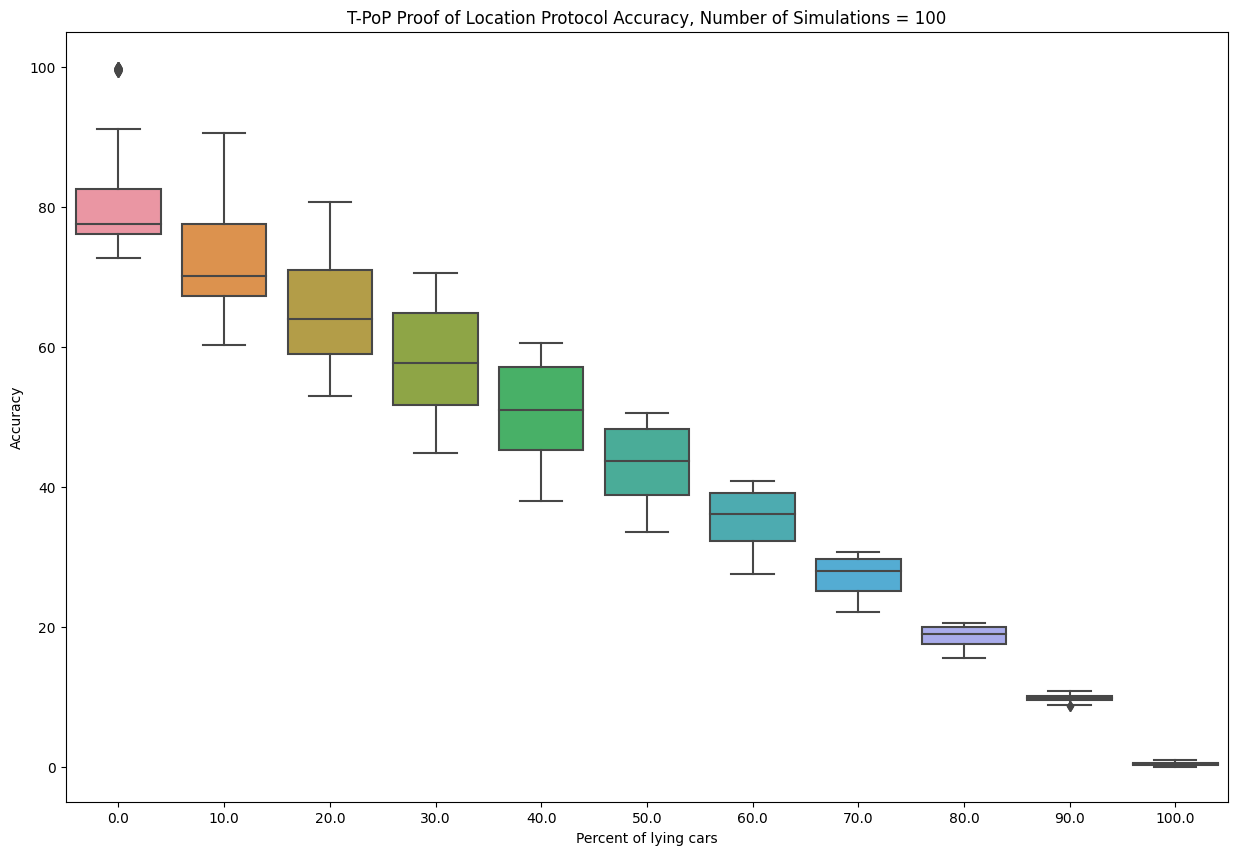

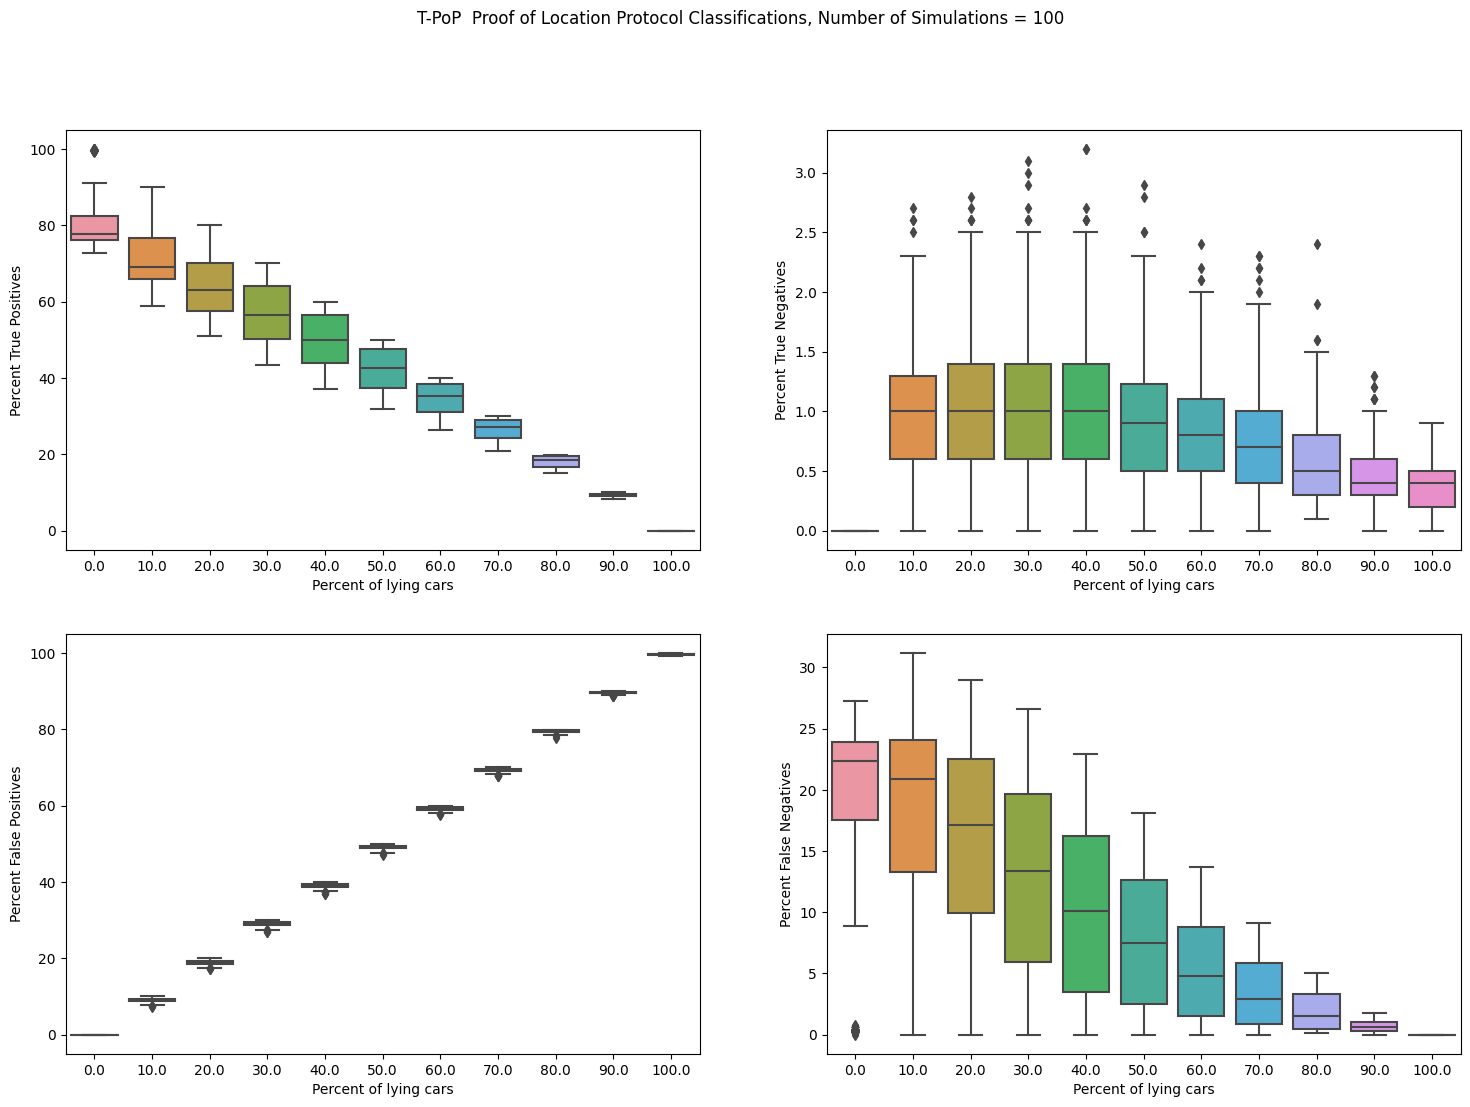

In [115]:
directory_pathfile = '/Users/amm3117/Desktop/T-PoP/Percent of lying cars/new simulations/'
sim.full_csv(directory_pathfile)

v.simulation_box_plots('T-PoP ', 100, directory_pathfile+'full_data.csv', 'Percent of lying cars', 'Accuracy')
v.subplots('T-PoP  ', directory_pathfile, 100, 'Percent of lying cars')
#v.simulation_violin_plots('Collaborative ', 100, directory_pathfile+'full_data.csv', 'Percent of lying cars', 'Accuracy') 